<a href="https://colab.research.google.com/github/liachicue/Linear_Classifier_Models/blob/main/Linear_Classifier_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MP2: Modelos Lineales para la Clasificación

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.utils.validation import check_random_state
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pd_speech_features.csv to pd_speech_features.csv
Saving Stars.csv to Stars.csv


Se escoje el dataseet a estudiar. Tenemos dos dataseet, el primero corresponde a un tipo de Clasificación de Cuerpos Celestes de la NASA `dfStars`; y el ultimo dirigido a la detección del Párkinson a partir de señales de voz `dfPD`.

In [ ]:
#@title. { display-mode: "form" }

DataSet = 'dfStars' #@param ["dfStars", "dfPD"]

#Tenemos Estrellas
dfStars = pd.read_csv('Stars.csv')
dfStars["Color"] = dfStars["Color"].astype('category').cat.codes
dfStars["Spectral_Class"] = dfStars["Spectral_Class"].astype('category').cat.codes




#Tenemos Parkinson
dfPD = pd.read_csv('pd_speech_features.csv')

print('Se ha escogido', DataSet)


Se ha escogido dfStars


In [ ]:
# Estrellas
X = dfStars.drop(columns=['Type'])
t = dfStars['Type']

In [ ]:
 #Parkinson
 X =dfPD.drop(columns=['class']) 
 t = dfPD['class'] 

Se realiza la separación de los datos de entrenamiento y los datos de prueba

In [ ]:
testSize = 0.7
X_train, X_test, y_train, y_test = train_test_split(X,t,test_size = testSize, random_state = 123)

Luego, seleccionamos el método de regresión linal:
1.   Mínimos Cuadrados
2.   Modelo Generativo - Gaussiano
3.   Modelo Discriminativo - Regresión Logística

### 1. Mínimos Cuadrados

In [ ]:
def Norm_Val(Y):
    n=Y.values.shape[0]
    m=Y.unique().shape[0]
    T = np.tile(np.zeros(m),(n,1))

    for i in range(0,n):
        for j in range(0,m):
              if Y.values[i]==j:
                  T[i,j]=1
    return T

def Modelo_MinCuadrados(DF, column, Xtrain,Xtest,ytrain,ytest):
  Ytrain_1 = Norm_Val(ytrain)
  Xtildetrain = np.concatenate((np.ones((ytrain.shape[0],1)),Xtrain), axis = 1) #Vector de unos de 40*6 
  Xtildetest = np.concatenate((np.ones((ytest.shape[0],1)),Xtest), axis = 1)
  
  XtildeT_train = Xtildetrain.T
  XtildeT_test = Xtildetest.T
  
  # Entrenamiento
  Wtilde_mse = np.linalg.inv(XtildeT_train@Xtildetrain)@( XtildeT_train @ Ytrain_1 )
  print('Wtilde: \n', Wtilde_mse)
  
  Y = Xtildetest@Wtilde_mse
  t_Est = np.argmax(Y,axis=1)

  Y_Test = Xtildetest@Wtilde_mse
  t_Est_Test = np.argmax(Y_Test,axis=1)
  return t_Est, t_Est_Test

Observemos cómo cambia el `accuracy_score` dependiendo del tamaño de los valores de prueba. 

**Para Estrellas**

`test_size`  | `accuracy_score`(%) 
-------------|-----------------------
0.25         | 88.3333
0.3          | 88.8889
0.5          | 80.8334
0.7          | 78.5714

**Para Parkinson**

`test_size`  | `accuracy_score`(%) 
-------------|-----------------------
0.25         | 49.735
0.3          | 50.6607
0.5          | 48.9417
0.7          | 51.5094


Estos valores tienen su origen en el balanceo del dataset.

Wtilde: 
 [[-1.09568055e-01  2.41788286e-02  5.60552308e-01  1.16208350e-01
   2.93469453e-01  1.15159115e-01]
 [-7.56688790e-07 -5.07284247e-06 -3.43130215e-06  2.14638766e-05
  -7.79213931e-06 -4.41090390e-06]
 [ 3.67517695e-07 -2.79977846e-07 -8.58356562e-08 -9.67368398e-07
   1.20104587e-06 -2.35381660e-07]
 [ 1.20433327e-04 -6.92332694e-06  1.33499359e-04 -3.94525618e-04
  -5.53775753e-04  7.01292012e-04]
 [ 2.65050735e-02  1.03825450e-02  1.51534338e-02 -2.76746541e-02
  -1.91061418e-02 -5.26025643e-03]
 [ 1.45622532e-03  5.46346499e-03 -4.12210065e-02  5.86629114e-02
  -2.19851983e-02 -2.37639693e-03]
 [ 2.41783438e-02  5.11938825e-02 -6.93162227e-02 -4.52146141e-02
   4.05382505e-02 -1.37963991e-03]]

 Acc(%):  78.57142857142857


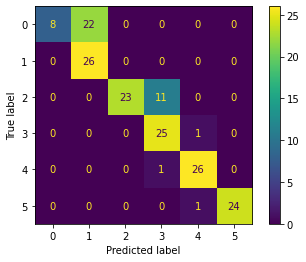

Etiquetas: [0 4 0 2 1 4 2 2 4 3]
Predicciones: [0 4 1 2 1 4 2 3 4 3]


In [ ]:
#Para Estrellas
y_Est,y_Est_Test = Modelo_MinCuadrados(dfStars,"Type", X_train,X_test,y_train,y_test)
acc = accuracy_score(y_test,y_Est)
print('\n Acc(%): ',acc*100)
cMat = confusion_matrix(y_test,y_Est)
ax = ConfusionMatrixDisplay(cMat, display_labels=dfStars['Type'].unique())
ax.plot()
plt.show()

#Mostremos las observaciones en las que el modelo se equivoco
print('Etiquetas:', y_test[:10].to_numpy())
print('Predicciones:', y_Est_Test[:10])

Wtilde: 
 [[ 1.26110293e+08  2.46190408e+08]
 [ 8.55500488e+03  1.74965718e+04]
 [ 7.90802125e+05  1.60907388e+06]
 ...
 [ 2.66905469e+03  5.19152734e+03]
 [-3.88878594e+04 -7.86568984e+04]
 [ 4.60928125e+03  9.37697559e+03]]

 Acc(%):  51.509433962264154


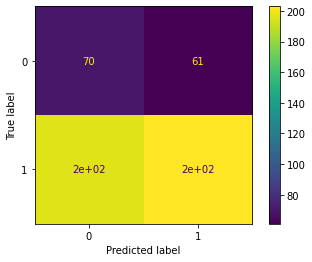

Etiquetas: [0 1 0 1 1 1 1 1 1 1]
Predicciones: [1 1 1 1 0 0 1 1 0 1]


In [ ]:
#Para Parkinson
t_Est, t_Est_Test= Modelo_MinCuadrados(dfPD,"class", X_train,X_test,y_train,y_test)
acc = accuracy_score(y_test,t_Est)
print('\n Acc(%): ',acc*100)
cMat = confusion_matrix(y_test,t_Est)
ax = ConfusionMatrixDisplay(cMat, display_labels=dfStars['Type'].unique())
ax.plot()
plt.show()

#Mostremos las observaciones en las que el modelo se equivoco
print('Etiquetas:', y_test[:10].to_numpy())
print('Predicciones:', t_Est[:10])

### 2. Modelo Generativo - Gaussiano

Con el fin de generar la matriz de Covarianza **$S$**, necesitamos los valores de $S_n$ para cada $n$, de la forma:

In [ ]:
def Sn_Multivariado(X,mu,N):
  MU = np.tile(mu,(N,1))
  S = (1/N)*(((X-MU).T)@(X-MU)) #Hago Norma Cuadratica
  return (S)

Y el Modelo generativo es:

In [ ]:
def Mod_Gen(DF, columns,size):
  val =len(DF.columns)
  if val == 755:
    df_mask=DF[columns]==0
    PD_C0=DF[df_mask]
    df_mask=DF[columns]==1
    PD_C1=DF[df_mask]

    Xtrain_PD0, Xtest_PD0, ytrain_PD0, ytest_PD0 = train_test_split(PD_C0.drop(columns=[columns]),PD_C0[columns],test_size = size, random_state = 123)
    Xtrain_PD1, Xtest_PD1, ytrain_PD1, ytest_PD1 = train_test_split(PD_C1.drop(columns=[columns]),PD_C1[columns],test_size = size, random_state = 123)
    
    NP0=Xtrain_PD0.shape[0]
    NP1=Xtrain_PD1.shape[0]
    NPD= NP0+NP1
    
    #N para test
    N0T=Xtest_PD0.shape[0]
    N1T=Xtest_PD1.shape[0]
    NTT=N0T+N1T
    
    pC0PD = NP0/NPD
    pC1PD = NP1/NPD
    
    mu0PD = Xtrain_PD0.mean(axis=0)
    mu1PD = Xtrain_PD1.mean(axis=0)
    
    S0PD = Sn_Multivariado(Xtrain_PD0,mu0PD,NP0)
    S1PD = Sn_Multivariado(Xtrain_PD1,mu1PD,NP1)
    
    SigmaPD = pC0PD*S0PD+ pC1PD*S1PD 
    
    #Hiperparámetros del modelo Generativo
    invSigmaPD = np.linalg.inv(SigmaPD)
    
    # para la clase 0
    w0 = invSigmaPD@mu0PD
    w00 = -0.5*(mu0PD.T)@(invSigmaPD@mu0PD) + np.log(pC0PD)
    # para la clase 1
    w1 = invSigmaPD@mu1PD
    w10 = -0.5*(mu1PD.T)@(invSigmaPD@mu1PD) + np.log(pC1PD)
          
    XPD = np.concatenate((Xtest_PD0,Xtest_PD1),axis = 0)
    A0PD = np.reshape((XPD@w0  + w00),(NTT,1))
    A1PD = np.reshape((XPD@w1  + w10),(NTT,1))

    A_kPD = np.concatenate((A0PD,A1PD),axis = 1)

    # Función Softmax "Posterior p(Ck/xn)"
    expAkPD = np.exp(A_kPD)
    pCk_dado_X_PD = expAkPD/np.tile(np.reshape(np.sum(expAkPD,axis=1),(NTT,1)),(1,2))
    
    t_Est = np.argmax(pCk_dado_X_PD,axis = 1)
    ytest=pd.concat([ytest_PD0,ytest_PD1], axis=0)

  else:
      df_mask=DF[columns]==0
      C0=DF[df_mask]
      df_mask=DF[columns]==1
      C1=DF[df_mask]
      df_mask=DF[columns]==2
      C2=DF[df_mask]
      df_mask=DF[columns]==3
      C3=DF[df_mask]
      df_mask=DF[columns]==4
      C4=DF[df_mask]
      df_mask=DF[columns]==5
      C5=DF[df_mask]

      Xtrain_C0, Xtest_C0, ytrain_C0, ytest_C0 = train_test_split(C0.drop(columns=['Type']), C0['Type'], test_size = size, random_state = 123)
      Xtrain_C1, Xtest_C1, ytrain_C1, ytest_C1 = train_test_split(C1.drop(columns=['Type']), C1['Type'], test_size = size, random_state = 123)
      Xtrain_C2, Xtest_C2, ytrain_C2, ytest_C2 = train_test_split(C2.drop(columns=['Type']), C2['Type'], test_size = size, random_state = 123)
      Xtrain_C3, Xtest_C3, ytrain_C3, ytest_C3 = train_test_split(C3.drop(columns=['Type']), C3['Type'], test_size = size, random_state = 123)
      Xtrain_C4, Xtest_C4, ytrain_C4, ytest_C4 = train_test_split(C4.drop(columns=['Type']), C4['Type'], test_size = size, random_state = 123)
      Xtrain_C5, Xtest_C5, ytrain_C5, ytest_C5 = train_test_split(C5.drop(columns=['Type']), C5['Type'], test_size = size, random_state = 123)
  
      #N para train
      N0=Xtrain_C0.shape[0]
      N1=Xtrain_C1.shape[0]
      N2=Xtrain_C2.shape[0]
      N3=Xtrain_C3.shape[0]
      N4=Xtrain_C4.shape[0]
      N5=Xtrain_C5.shape[0]
      N=N0+N1+N2+N3+N4+N5
           
      #N para test
      N0T=Xtest_C0.shape[0]
      N1T=Xtest_C1.shape[0]
      N2T=Xtest_C2.shape[0]
      N3T=Xtest_C3.shape[0]
      N4T=Xtest_C4.shape[0]
      N5T=Xtest_C5.shape[0]
      NTT=N0T+N1T+N2T+N3T+N4T+N5T
      
      pC0 = N0/N
      pC1 = N1/N
      pC2 = N2/N
      pC3 = N3/N
      pC4 = N4/N
      pC5 = N5/N

      mu0 = Xtrain_C0.mean(axis=0)
      mu1 = Xtrain_C1.mean(axis=0)
      mu2 = Xtrain_C2.mean(axis=0)
      mu3 = Xtrain_C3.mean(axis=0)
      mu4 = Xtrain_C4.mean(axis=0)
      mu5 = Xtrain_C5.mean(axis=0)
              
      S0 = Sn_Multivariado(Xtrain_C0,mu0,N0)
      S1 = Sn_Multivariado(Xtrain_C1,mu1,N1)
      S2 = Sn_Multivariado(Xtrain_C2,mu2,N2)
      S3 = Sn_Multivariado(Xtrain_C3,mu3,N3)
      S4 = Sn_Multivariado(Xtrain_C4,mu5,N4)
      S5 = Sn_Multivariado(Xtrain_C5,mu5,N5)
      Sigma = pC0*S0+ pC1*S1 + pC2*S2 + pC3*S3 + pC4*S4 + pC5*S5
    
      #Ahora calcularemos los hiperparámetros del modelo Generativo
      invSigma = np.linalg.inv(Sigma)

      # para la clase 0
      w0 = invSigma@mu0
      w00 = -0.5*(mu0.T)@(invSigma@mu0) + np.log(pC0)
      # para la clase 1
      w1 = invSigma@mu1
      w10 = -0.5*(mu1.T)@(invSigma@mu1) + np.log(pC1)
      # para la clase 2
      w2 = invSigma@mu2
      w20 = -0.5*(mu2.T)@(invSigma@mu2) + np.log(pC2)
      # para la clase 3
      w3 = invSigma@mu3
      w30 = -0.5*(mu3.T)@(invSigma@mu3) + np.log(pC3)
      # para la clase 4
      w4 = invSigma@mu4
      w40 = -0.5*(mu4.T)@(invSigma@mu4) + np.log(pC4)
      # para la clase 5
      w5 = invSigma@mu5
      w50 = -0.5*(mu5.T)@(invSigma@mu5) + np.log(pC5)
      
      X = np.concatenate((Xtest_C0,Xtest_C1,Xtest_C2,Xtest_C3,Xtest_C4,Xtest_C5),axis = 0)
      Xt = np.concatenate((Xtrain_C0,Xtrain_C1,Xtrain_C2,Xtrain_C3,Xtrain_C4,Xtrain_C5),axis = 0)
      
      A0 = np.reshape((X@w0  + w00),(NTT,1))
      A1 = np.reshape((X@w1  + w10),(NTT,1))
      A2 = np.reshape((X@w2  + w20),(NTT,1))
      A3 = np.reshape((X@w3  + w30),(NTT,1))
      A4 = np.reshape((X@w4  + w40),(NTT,1))
      A5 = np.reshape((X@w5  + w50),(NTT,1))
      A_k = np.concatenate((A0,A1,A2,A3,A4,A5),axis = 1)
      
      # Luego pasamos las activaciones por la función Softmax "Calculamos el posterior p(Ck/xn)"
      expAk = np.exp(A_k)
      pCk_dado_X = expAk/np.tile(np.reshape(np.sum(expAk,axis=1),(NTT,1)),(1,6))
      ytest=pd.concat([ytest_C0,ytest_C1,ytest_C2,ytest_C3,ytest_C4,ytest_C5], axis=0)
      t_Est = np.argmax(pCk_dado_X,axis = 1)

  return(t_Est, ytest)

Observemos cómo cambia el `accuracy_score` dependiendo del tamaño de los valores de prueba. 

**Para Estrellas**

`test_size`  | `accuracy_score`(%) 
-------------|-----------------------
0.25         | 98.3333
0.3          | 98.61111
0.5          | 98.6111
0.7          | 98.6111

**Para Parkinson**

`test_size`  | `accuracy_score`(%) 
-------------|-----------------------
0.25         | 25.4385
0.3          | 25.4385
0.5          | 25.4716
0.7          | 25.4716


In [ ]:
#Para Estrellas
t_Est,ytest = Mod_Gen(dfStars,"Type",testSize)
acc = accuracy_score(ytest,t_Est)
print('Accuracy: ',acc*100.)
cMat = confusion_matrix(ytest,t_Est)
ax = ConfusionMatrixDisplay(cMat, display_labels=dfStars['Type'].unique())
ax.plot()
plt.show()

#Mostremos las observaciones en las que el modelo se equivoco
print('Etiquetas:', y_test[:10].to_numpy())
print('Predicciones:', t_Est[:10])

In [ ]:
#Para Parkinson
t_Est,ytest = Mod_Gen(dfPD,"class",size)
acc = accuracy_score(ytest,t_Est)
print('Accuracy: ',acc*100.)
cMat = confusion_matrix(ytest,t_Est)
ax = ConfusionMatrixDisplay(cMat, display_labels=dfPD['class'].unique())
ax.plot()
plt.show()

#Mostremos las observaciones en las que el modelo se equivoco
print('Etiquetas:', y_test[:10].to_numpy())
print('Predicciones:', t_Est[:10])

### 3. Modelo Discriminativo - Regresión Logística

Estudiemos cómo cambia el `accuracy_score` dependiendo del tamaño de los valores de prueba. 

**Para Estrellas**

`test_size`  | `accuracy_score`(%) 
-------------|-----------------------
0.25         | 100 
0.3          | 100
0.5          | 97.5
0.7          | 94.04761904761905

**Para Parkinson**

`test_size`  | `accuracy_score`(%) 
-------------|-----------------------
0.25         | 75.66137566137566 
0.3          | 75.33039647577093
0.5          | 77.5132275132275
0.7          | 76.79245283018868


Continuemos comparando los valores del `accuracy_score` con los parámetros del Modelo. 

**Para Estrellas**
Para esto se dejará un `test_size` de 0.3.

* `Regularización C = 1e6`

Penalidad   | `solver`     | `accuracy_score`(%)
------------|--------------|------------------ 
l1          | liblinear    | 100.0
l1          | saga         | 55.5556
l2          | liblinear    | 95.8334
l2          | newton-cg    | 100.0
l2          | saga         | 55.5556

* Con `Regularización C = 100`

Penalidad   | `solver`     | `accuracy_score`(%)
------------|--------------|------------------ 
l1          | liblinear    | 100.0
l1          | saga         | 55.5556
l2          | liblinear    | 95.8334
l2          | newton-cg    | 100.0
l2          | saga         | 55.5556

* Con `Regularización C = 1`

Penalidad   | `solver`     | `accuracy_score`(%)
------------|--------------|------------------ 
l1          | liblinear    | 100.0
l1          | saga         | 55.5556
l2          | liblinear    | 95.8334
l2          | newton-cg    | 100.0
l2          | saga         | 55.5556


* Con `Regularización C = 1e-6`

Penalidad   | `solver`     | `accuracy_score`(%)
------------|--------------|------------------ 
l1          | liblinear    | 13.8889
l1          | saga         | 15.2779
l2          | liblinear    | 61.1114
l2          | newton-cg    | 81.9444
l2          | saga         | 55.5556


**Para Parkinson**
Para esto se dejará un `test_size` de 0.7.

* `Regularización C = 1e6`

Penalidad   | `solver`     | `accuracy_score`(%)
------------|--------------|------------------ 
l1          | liblinear    | 79.4339
l1          | saga         | 74.9056
l2          | liblinear    | 77.1698
l2          | newton-cg    | 75.2830
l2          | saga         | 74.9056

* `Regularización C = 100`

Penalidad   | `solver`     | `accuracy_score`(%)
------------|--------------|------------------ 
l1          | liblinear    | 79.4339
l1          | saga         | 74.9056
l2          | liblinear    | 77.3584
l2          | newton-cg    | 73.7735
l2          | saga         | 74.9056

* `Regularización C = 1`

Penalidad   | `solver`     | `accuracy_score`(%)
------------|--------------|------------------ 
l1          | liblinear    | 75.8490
l1          | saga         | 74.9056 
l2          | liblinear    | 79.2452
l2          | newton-cg    | 73.7735
l2          | saga         | 74.9056

* `Regularización C = 1e-6`

Penalidad   | `solver`     | `accuracy_score`(%)
------------|--------------|------------------ 
l1          | liblinear    | 78.113
l1          | saga         | 74.9056 
l2          | liblinear    | 77.1698
l2          | newton-cg    | 75.0943
l2          | saga         | 74.9056


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(X.iloc[:, :-1].values)
X = imputer.transform(X.iloc[:, :-1].values)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


ACC 55.55555555555556


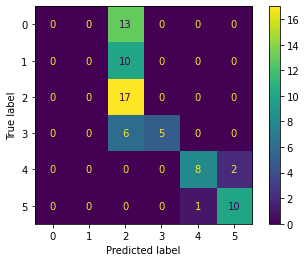

In [ ]:
#Estrellas
model_LR = LogisticRegression(penalty='l2',C =1e-6,max_iter=5000,solver='saga')
model_LR.fit(Xtrain,ytrain)

yEst = model_LR.predict(Xtest)

from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print('ACC', accuracy_score(ytest,yEst)*100.)
cmat = confusion_matrix(ytest,yEst)
ax = ConfusionMatrixDisplay(cmat,display_labels=dfStars['Type'].unique())
ax.plot()
plt.show()

In [ ]:
##Parkinson
## Sin balanceo
model_LR = LogisticRegression(penalty = 'l2', C=1e-6, max_iter=700, solver='newton-cg')
model_LR.fit(Xtrain, ytrain) 


yEst = model_LR.predict(Xtest)
print('ACC', accuracy_score(ytest,yEst)*100.)
cmat = confusion_matrix(ytest,yEst)
ax = ConfusionMatrixDisplay(cmat,display_labels=['Negative','Positive'])
ax.plot()
plt.show()

### Accuracy y Balanceo de DataSets

Cabe resaltar que, para el DataSet `dfStars` no es necesario realizar el balanceo del dataset, debido a que los target t = dfStars['Type'] tienen un valor de 40 para cada uno . Por tanto, ya estan balanceados.

```
X = dfStars.drop(columns=['Type'])
t = dfStars['Type']

print(t.unique())
print(t.value_counts())

X = X.values
t = t.values
```

Entonces para  `dfDP` parkinson:



In [ ]:
X = dfPD.drop(columns=['class'])
y = dfPD['class']
print(y.unique())
print(y.value_counts())

X = X.values
y = y.values

# Seleccionemos los X por clase
Xsanos = X[y == 0]
ysanos = np.zeros(len(Xsanos))
Xpd = X[y == 1]
ypd = np.ones(len(Xpd))

In [ ]:
nreps = 100
accReps = []
for n in range(0,nreps):
  # Luego hacemos una selección aleatoria de un 
  # subconjunto de la clase que mas observaciones presenta
  idx = np.random.permutation(len(ypd))
  idx_set = idx[:len(ysanos)]

  Xpd_set = Xpd[idx_set]
  ypd_set = ypd[idx_set]

  # Rearmo mi dataset balanceado
  X = np.concatenate((Xsanos,Xpd_set),axis=0)
  y = np.concatenate((ysanos,ypd_set),axis=0)

  Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.25, random_state = 123)
  model_LR = LogisticRegression(penalty='l2',C = 1,max_iter=7000,solver='lbfgs')
  model_LR.fit(Xtrain,ytrain)

  yEst = model_LR.predict(Xtest)
  acc =accuracy_score(ytest,yEst)*100.
  accReps.append(acc)


print('ACC (mean +/- std)',np.mean(accReps),'+/-',np.std(accReps))
print('ACC (%)',acc)
cmat = confusion_matrix(ytest,yEst)
ax = ConfusionMatrixDisplay(cmat,display_labels=dfPD['class'].unique())
ax.plot()
plt.show()

In [ ]:
plt.plot(accReps)

Con respecto al `accuracy_core` y el balanceo del DataSet:

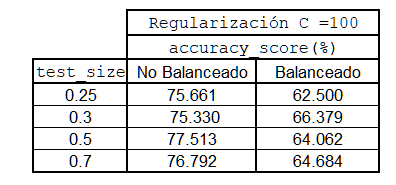



Y respecto a los demás parámetros del modelo:
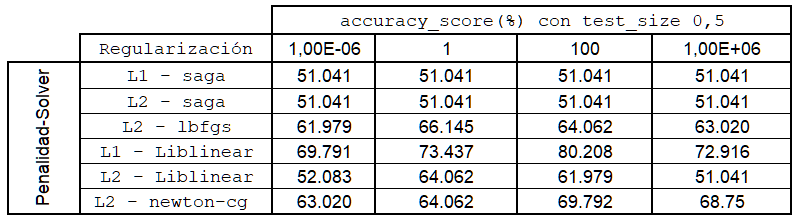